<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   datetime                     24 non-null     datetime64[ns, UTC]
 1   temperature_2m               24 non-null     float64            
 2   wind_speed_180m              24 non-null     float64            
 3   wind_speed_120m              24 non-null     float64            
 4   direct_radiation             24 non-null     float64            
 5   quantity_biomass             24 non-null     float64            
 6   quantity_fossil_gas          24 non-null     float64            
 7   quantity_fossil_hard_coal    24 non-null     float64            
 8   quantity_hydro_run_of_river  24 non-null     float64            
 9   quantity_nuclear             24 non-null     float64            
 10  quantity_solar               24 non-null     float64

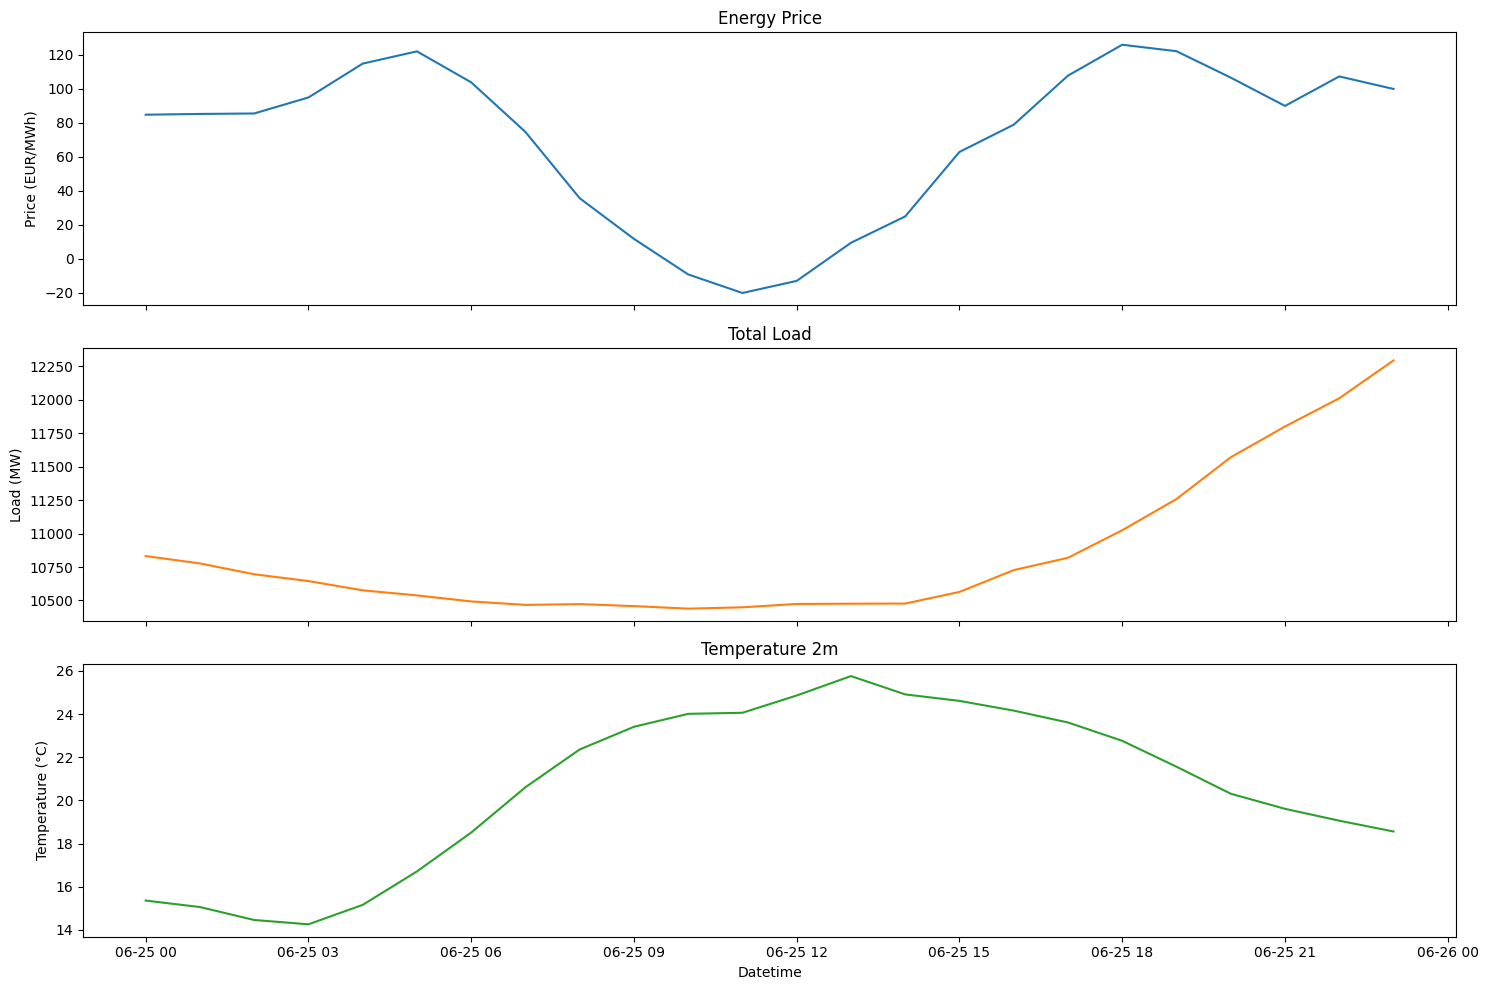

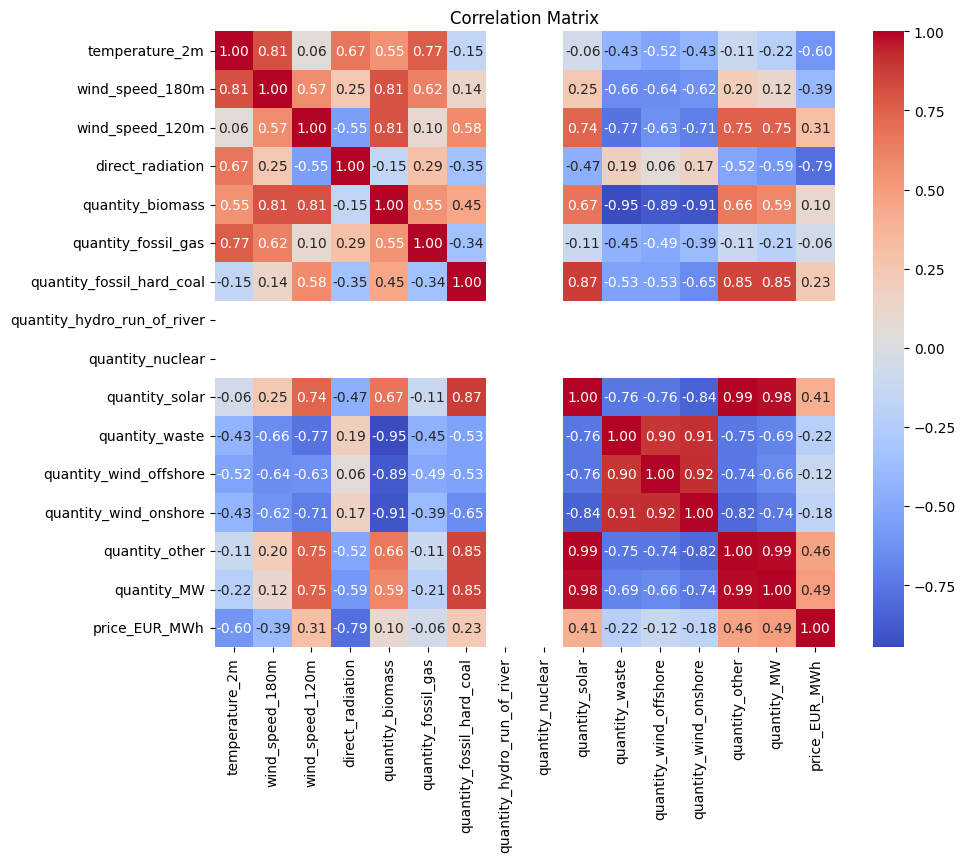

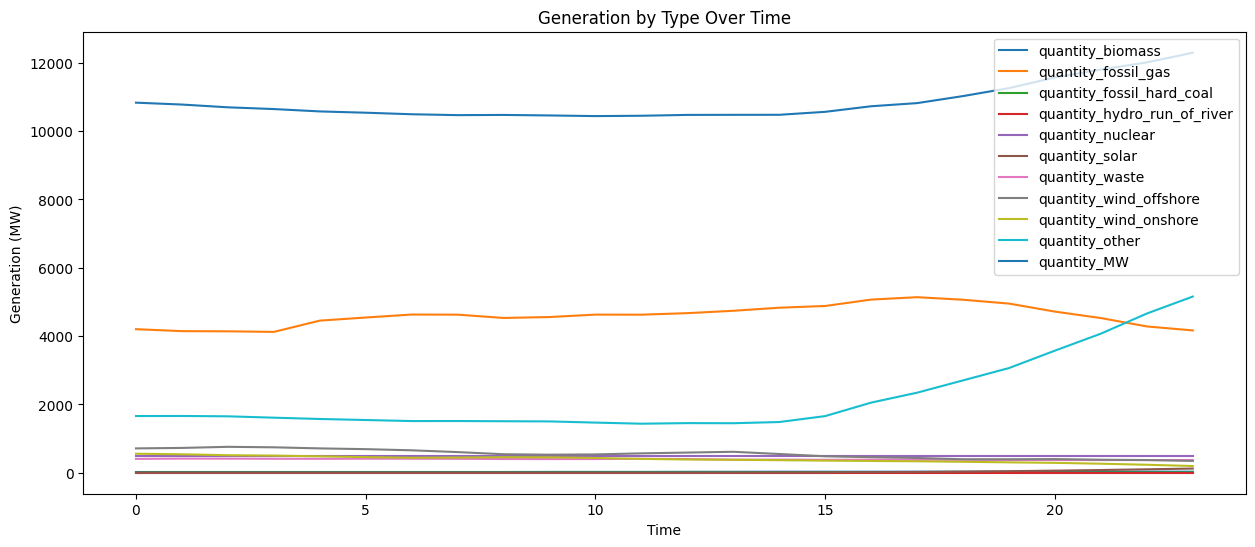

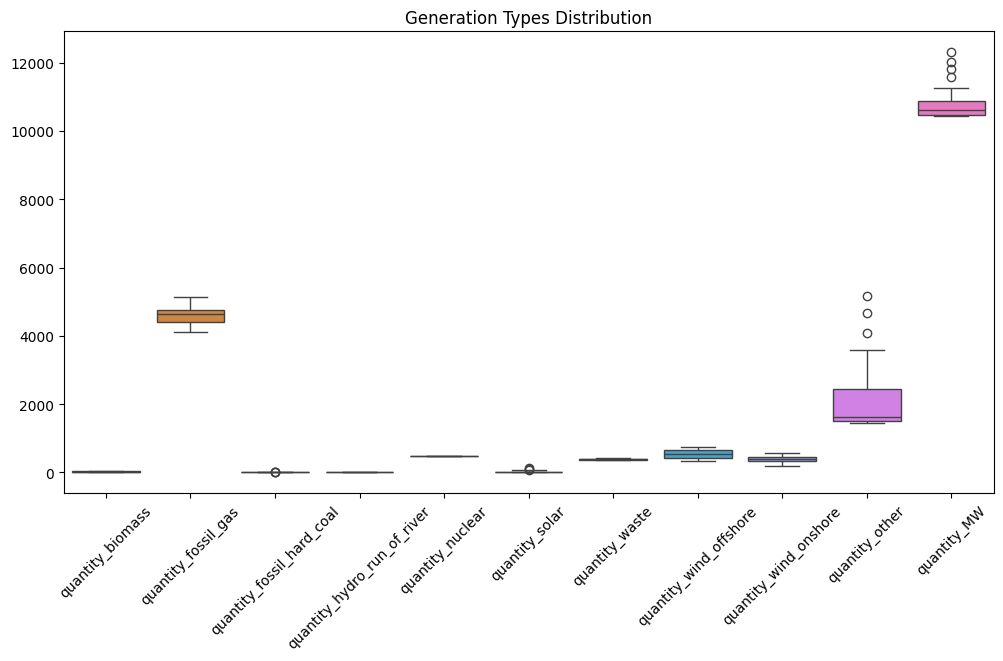

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/merged_data.csv", parse_dates=["datetime"])

# Data structure
print(df.info())
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Plot time series overview (Prices, Load, Temperature)
fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

# Price plot
axs[0].plot(df["datetime"], df["price_EUR_MWh"], color="tab:blue")
axs[0].set_ylabel("Price (EUR/MWh)")
axs[0].set_title("Energy Price")

# Load plot
axs[1].plot(df["datetime"], df["quantity_MW"], color="tab:orange")
axs[1].set_ylabel("Load (MW)")
axs[1].set_title("Total Load")

# Temperature plot
axs[2].plot(df["datetime"], df["temperature_2m"], color="tab:green")
axs[2].set_ylabel("Temperature (°C)")
axs[2].set_title("Temperature 2m")
axs[2].set_xlabel("Datetime")

plt.tight_layout()
plt.show()

# Correlation heatmap (select numeric columns)
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Generation types overview
generation_cols = [col for col in df.columns if col.startswith("quantity_")]
df[generation_cols].plot(figsize=(15,6))
plt.title("Generation by Type Over Time")
plt.xlabel("Time")
plt.ylabel("Generation (MW)")
plt.show()

# Boxplot to check for outliers in generation types
plt.figure(figsize=(12,6))
sns.boxplot(data=df[generation_cols])
plt.title("Generation Types Distribution")
plt.xticks(rotation=45)
plt.show()
